<a href="https://colab.research.google.com/github/Apeksha-Shah/ML-Models/blob/main/XORModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Xor Model training using Kaggle XOR Dataset

import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv('/content/sample_data/Xor_Dataset.csv')
df

,X,Y,Z
0,0,0,0
1,0,1,1
2,1,1,0
3,1,1,0
4,0,0,0
...,...,...,...
9995,0,0,0
9996,0,1,1
9997,1,1,0
9998,1,1,0


(7500, 2)
(2500, 2)
(7500,)
(2500,)


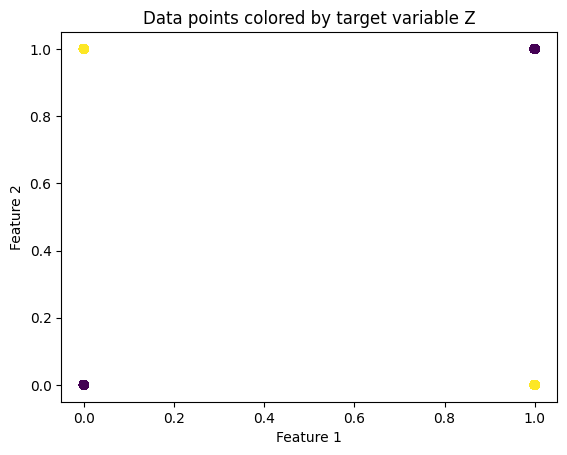

In [51]:
X = df.drop('Z', axis=1)
y = df['Z']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Assuming X has two features (columns)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data points colored by target variable Z')
plt.show()


In [52]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=100,validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2945 - loss: 0.7018 - val_accuracy: 0.7427 - val_loss: 0.6626
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7620 - loss: 0.6477 - val_accuracy: 0.7427 - val_loss: 0.6071
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7483 - loss: 0.5848 - val_accuracy: 0.7427 - val_loss: 0.5214
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.4972 - val_accuracy: 1.0000 - val_loss: 0.4295
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4014 - val_accuracy: 1.0000 - val_loss: 0.3496
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3232 - val_accuracy: 1.0000 - val_loss: 0.2865
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.2639 - val_accuracy: 1.0000 - val_loss: 0.2363
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.2255 - val_accu

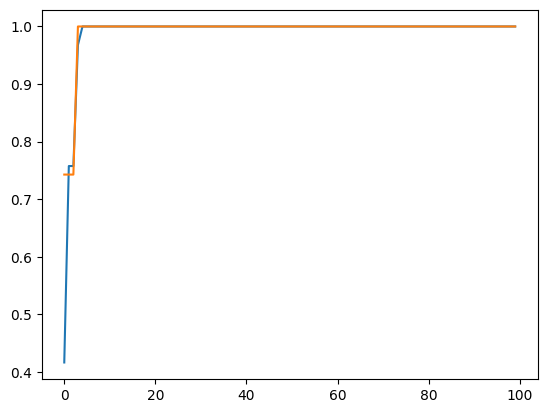

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

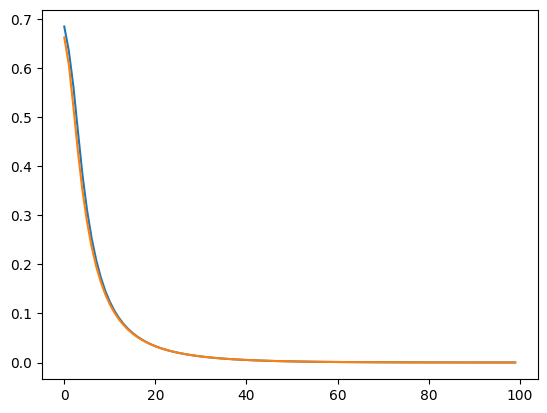

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [58]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(y_pred_binary)
print("\naccuracy: ")
accuracy_score(y_test,y_pred_binary)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]

accuracy: 


1.0

In [62]:
y_pred_prob = model.predict(pd.DataFrame([[0, 1]], columns=['feature1', 'feature2']))

y_pred_binary = (y_pred_prob > 0.5).astype(int)

print(y_pred_binary[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1
